In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

In [125]:
covid=pd.read_csv("COVID-19_casus_landelijk.csv", sep=";")
gr = covid.groupby("Province")
z = gr.count()
covid.head()

,Date_file,Date_statistics,Date_statistics_type,Agegroup,Sex,Province,Hospital_admission,Deceased,Week_of_death,Municipal_health_service
0,2020-06-17 10:00:00,2020-01-01,DOO,40-49,Female,Noord-Holland,No,No,NaN,GGD Amsterdam
1,2020-06-17 10:00:00,2020-01-20,DOO,50-59,Female,Gelderland,No,No,NaN,GGD Gelderland-Zuid
2,2020-06-17 10:00:00,2020-01-29,DOO,80-89,Male,Overijssel,No,No,NaN,GGD Regio Twente
3,2020-06-17 10:00:00,2020-01-31,DOO,90+,Female,Noord-Holland,No,No,NaN,GGD Amsterdam
4,2020-06-17 10:00:00,2020-01-31,DOO,80-89,Male,Noord-Brabant,Yes,Yes,202015.0,GGD Brabant Zuid-Oost


In [126]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49204 entries, 0 to 49203
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date_file                 49204 non-null  object 
 1   Date_statistics           49204 non-null  object 
 2   Date_statistics_type      49204 non-null  object 
 3   Agegroup                  49204 non-null  object 
 4   Sex                       49204 non-null  object 
 5   Province                  49204 non-null  object 
 6   Hospital_admission        49204 non-null  object 
 7   Deceased                  49204 non-null  object 
 8   Week_of_death             6067 non-null   float64
 9   Municipal_health_service  49204 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.8+ MB


In [127]:
covid["Province"].value_counts()

Zuid-Holland     10907
Noord-Brabant     9637
Noord-Holland     7119
Gelderland        6476
Limburg           4857
Utrecht           3929
Overijssel        3059
Flevoland          969
Zeeland            728
Friesland          632
Drenthe            533
Groningen          358
Name: Province, dtype: int64

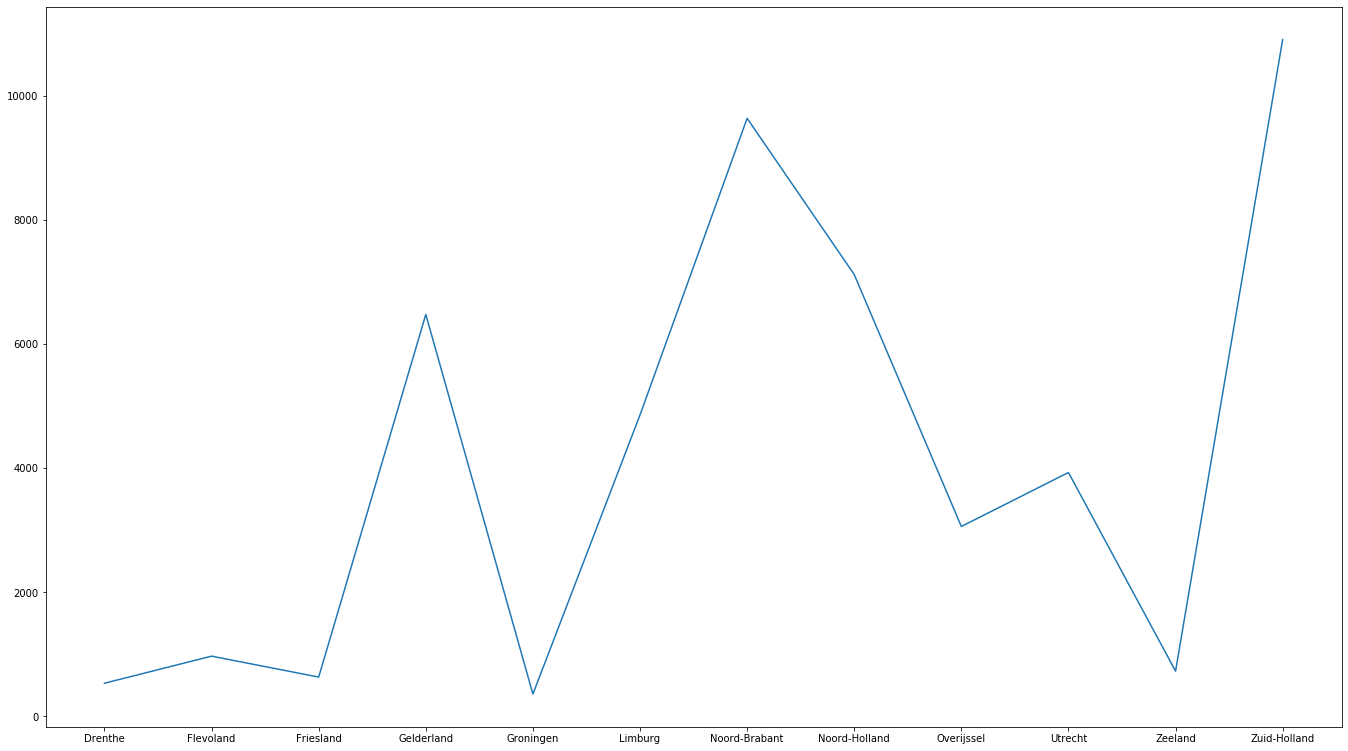

In [128]:
dec = covid[covid['Deceased']==1].groupby("Province").count()
dec2 = covid[(covid['Hospital_admission']==0) & (covid['Deceased']==1)].groupby("Province").count()

fig=plt.figure()
fig.set_size_inches(18, 10)

afb = fig.add_axes([0.0,0.0,1,1])
afb.plot(z.iloc[:,2])
afb.plot(dec.iloc[:,2])
afb.plot(dec2.iloc[:,2])

In [129]:
def Make_Boolean_numeric(x):
    if x=="Yes":
        return 1
    else:
        return 0

def Make_Sex_numeric(x):
    if x=="Male":
        return 1
    else:
        return 0

covid.drop(columns=['Date_file', 'Date_statistics_type', 'Week_of_death'], inplace=True)
covid['Deceased'] = covid['Deceased'].apply(lambda x: Make_Boolean_numeric(x))
covid['Hospital_admission'] = covid['Hospital_admission'].apply(lambda x: Make_Boolean_numeric(x))
covid['Sex'] = covid['Sex'].apply(lambda x: Make_Sex_numeric(x))

In [130]:
province_encoder = OrdinalEncoder()
covid[['Province']] = province_encoder.fit_transform(covid[['Province']])

age_encoder = OrdinalEncoder()
covid[['Agegroup']] = age_encoder.fit_transform(covid[['Agegroup']])

ggd_encoder = OrdinalEncoder()
covid[['Municipal_health_service']] = ggd_encoder.fit_transform(covid[['Municipal_health_service']])

i=0
for x in province_encoder.categories_:
    for a in x:
        print(str(i) + " = " + str(a))
        i = i + 1

i=0
for x in age_encoder.categories_:
    for a in x:
        print(str(i) + " = " + str(a))
        i = i + 1
        
i=0
for x in ggd_encoder.categories_:
    for a in x:
        print(str(i) + " = " + str(a))
        i = i + 1

0 = Drenthe
1 = Flevoland
2 = Friesland
3 = Gelderland
4 = Groningen
5 = Limburg
6 = Noord-Brabant
7 = Noord-Holland
8 = Overijssel
9 = Utrecht
10 = Zeeland
11 = Zuid-Holland
0 = 0-9
1 = 10-19
2 = 20-29
3 = 30-39
4 = 40-49
5 = 50-59
6 = 60-69
7 = 70-79
8 = 80-89
9 = 90+
10 = <50
11 = Unknown
0 = Dienst Gezondheid & Jeugd ZHZ
1 = GGD Amsterdam
2 = GGD Brabant Zuid-Oost 
3 = GGD Drenthe
4 = GGD Flevoland
5 = GGD Fryslân
6 = GGD Gelderland-Midden
7 = GGD Gelderland-Zuid
8 = GGD Gooi en Vechtstreek
9 = GGD Groningen
10 = GGD Haaglanden
11 = GGD Hart voor Brabant
12 = GGD Hollands Midden
13 = GGD Hollands Noorden
14 = GGD IJsselland
15 = GGD Kennemerland
16 = GGD Limburg Noord
17 = GGD Noord en Oost Gelderland
18 = GGD Regio Twente
19 = GGD Rotterdam Rijnmond
20 = GGD West Brabant
21 = GGD Zaanstreek-Waterland
22 = GGD Zeeland
23 = GGD Zuid Limburg
24 = GGD regio Utrecht


In [131]:
import datetime as dt

def Compute_day(x):
    date_time_obj = dt.datetime.strptime(x, '%Y-%m-%d')
    dtime = dt.datetime.now()
    delta = dtime - date_time_obj
    return delta.days
    
covid['Date_statistics'] = covid['Date_statistics'].apply(lambda x: Compute_day(x))

In [132]:
covid.head()

,Date_statistics,Agegroup,Sex,Province,Hospital_admission,Deceased,Municipal_health_service
0,175,4.0,0,7.0,0,0,1.0
1,156,5.0,0,3.0,0,0,7.0
2,147,8.0,1,8.0,0,0,18.0
3,145,9.0,0,7.0,0,0,1.0
4,145,8.0,1,6.0,1,1,2.0


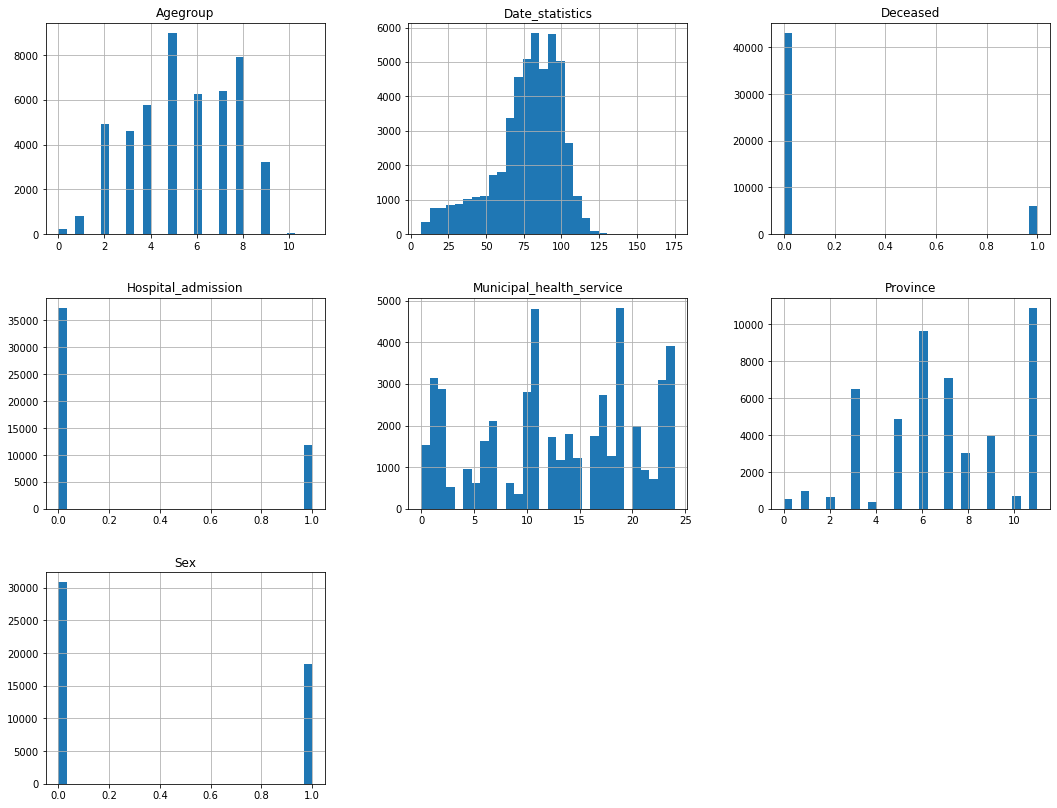

In [133]:
covid.hist(bins=30, figsize=(18,14))
plt.show()

In [134]:
corr_matrix = covid.corr()
corr_matrix["Deceased"].sort_values(ascending=False)

Deceased                    1.000000
Agegroup                    0.388249
Hospital_admission          0.146560
Sex                         0.136272
Date_statistics             0.106376
Municipal_health_service    0.006788
Province                   -0.003574
Name: Deceased, dtype: float64

In [135]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(covid, test_size=0.2)


In [136]:
def split_x_y(alldata):
    xs = alldata.iloc[:,[0,1,2,4,6]].to_numpy(dtype=float)
    ys = alldata.iloc[:,[5]].to_numpy(dtype=float)
    print(xs.shape)
    print(ys.shape)
    m = xs.shape[0]
    print("number of rows = " + str(m))
    input_shape = xs.shape
    print("input shape x = " + str(input_shape))
    print("input shape y = " + str(ys.shape))
    print("type xs = " + str(type(xs)))
    print('')
    return xs, ys

trainx, trainy = split_x_y(train)
testx, testy = split_x_y(test)

(39363, 5)
(39363, 1)
number of rows = 39363
input shape x = (39363, 5)
input shape y = (39363, 1)
type xs = <class 'numpy.ndarray'>

(9841, 5)
(9841, 1)
number of rows = 9841
input shape x = (9841, 5)
input shape y = (9841, 1)
type xs = <class 'numpy.ndarray'>



In [137]:
# xs = np.array(['a', 'b', 'c', 'd', 'e', 'f'], dtype=str)
# xs = np.array([1,2,3,4,5,6], dtype=float)

# xs = np.array([[1,2],[3,4],[3,5],[5,6],[6,7],[8,9]], dtype=float)
# ys = np.array([1.0,1.5,2.0,2.5,3.0,3.5], dtype=float)
# model.add(keras.layers.Dense(units=2, input_shape=[2], activation='relu'))
# model.add(keras.layers.Dense(units=8, input_shape=[2], activation='relu'))
mode = 1

class StopTraining(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.875) and (logs.get('loss')<0.1):
      print("\n87,5% accuracy bereikt, dus algorithme stopt met trainen")
      self.model.stop_training = True
        
if (mode==1):
    print("Neuraal netwerk")
    model = tf.keras.Sequential()
    model.add(keras.layers.Dense(units=3, input_shape=[5], activation="relu"))
    model.add(keras.layers.Dense(1, activation="linear"))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    model.fit(trainx, trainy, epochs=10, callbacks=[StopTraining()])
    model.summary()

if (mode==2):
    print("Lineaire regressie")

model.evaluate(testx, testy)

Neuraal netwerk
Epoch 1/10
1231/1231 [==============================] - 2s 2ms/step - loss: 59.2763 - accuracy: 0.3495
Epoch 2/10
1231/1231 [==============================] - 2s 1ms/step - loss: 0.4006 - accuracy: 0.7587
Epoch 3/10
1231/1231 [==============================] - 2s 1ms/step - loss: 0.1273 - accuracy: 0.8568
Epoch 4/10
1231/1231 [==============================] - 2s 1ms/step - loss: 0.1104 - accuracy: 0.8740
Epoch 5/10
1231/1231 [==============================] - 1s 1ms/step - loss: 0.1081 - accuracy: 0.8756
Epoch 6/10
1231/1231 [==============================] - 1s 1ms/step - loss: 0.1067 - accuracy: 0.8764
Epoch 7/10
1231/1231 [==============================] - 1s 1ms/step - loss: 0.1057 - accuracy: 0.8768
Epoch 8/10
1231/1231 [==============================] - 1s 1ms/step - loss: 0.1048 - accuracy: 0.8770
Epoch 9/10
1231/1231 [==============================] - 1s 1ms/step - loss: 0.1037 - accuracy: 0.8771
Epoch 10/10
1231/1231 [==============================] - 2s 2ms/s

[0.09731075912714005, 0.8744029998779297]

In [163]:
# i = 2
# print(testx[[i]])
# print(type(testx[[i]]))
# print(model.predict(testx[[i]]))

# 96 = 96 dagen geleden tov vandaag
# 8 = leeftijd tussen 80-89 jaar
# 0 = Man
# 1 = Opgenomen in ziekenhuis
# 2 = Hart voor Brabant
x = np.array([[96.,  8.,  0.,  1., 11.]])

print(model.predict(x))


[[0.20819755]]
